In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blank_img, text = "ABCDE", org=(50, 300), fontFace=font, 
                fontScale=5, color=(255, 255, 255), thickness=25,
               lineType = cv2.LINE_AA)
    return blank_img
#     display_img(img)


In [26]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

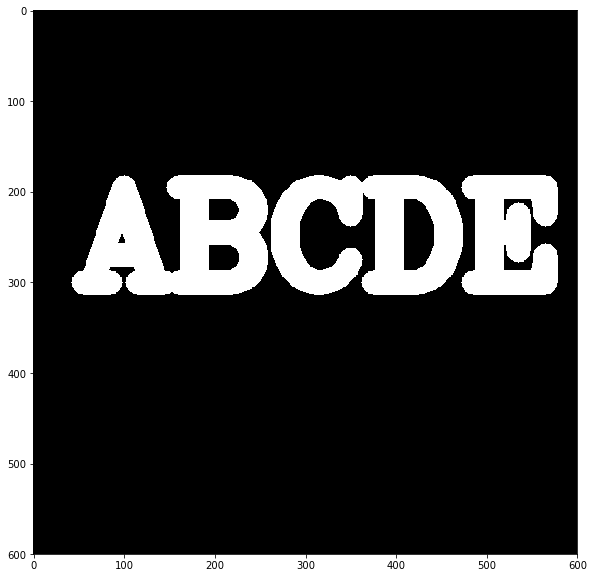

In [27]:
img = load_img()
display_img(img)

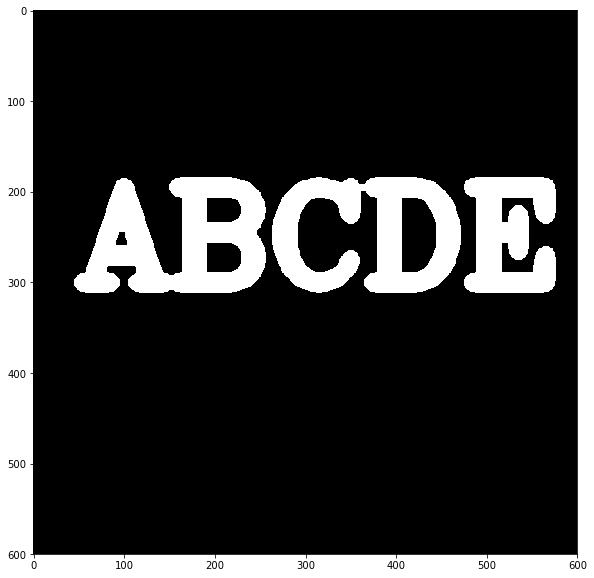

In [28]:
# 날카로운 이미지 생성

img = load_img()
kernel = np.ones((5,5), np.uint8)
erosion1 = cv2.erode(img, kernel, iterations=1)
display_img(erosion1)

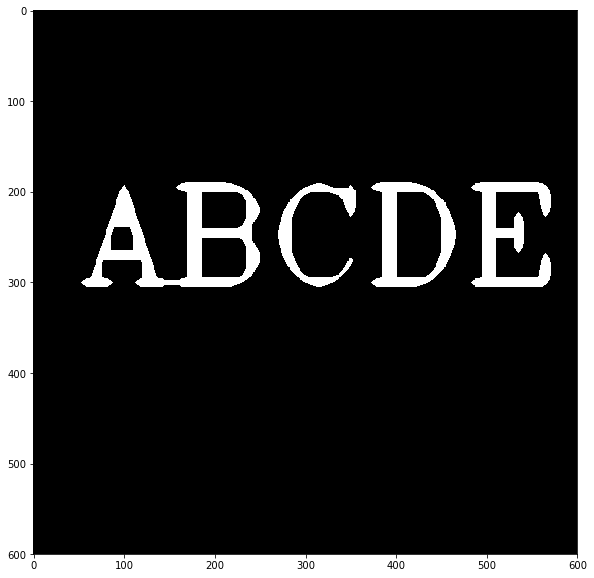

In [29]:
# 날카로운 이미지 생성

img = load_img()
# kernel = np.ones((5.5), np.uint8)
erosion4 = cv2.erode(img, kernel, iterations=4) #iterations이 커지면 더 얇아진다.
display_img(erosion4)

# opening
* erosion - dilation => opening  (remove noise from background)

In [30]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size = (600, 600))
white_noise

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0]])

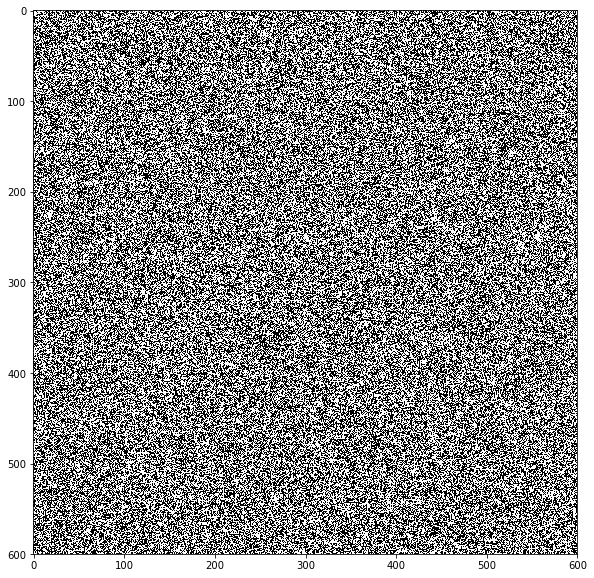

In [31]:
display_img(white_noise)

In [32]:
white_noise= white_noise * 255

white_noise.shape

(600, 600)

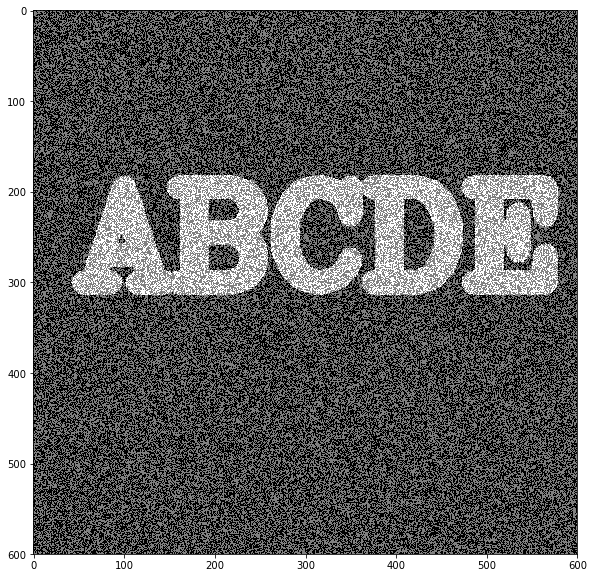

In [33]:
noise_img = white_noise + img

display_img(noise_img)

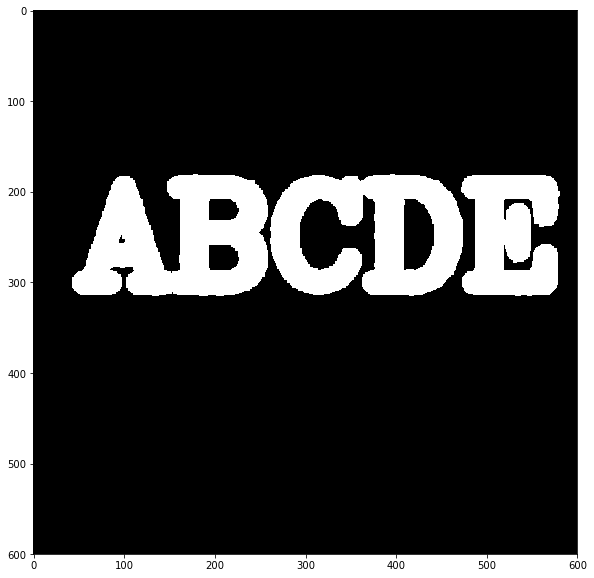

In [34]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel) 
display_img(opening)

noise_img -> opening : noise 제거된 것을 확인 할 수 있다.

https://webnautes.tistory.com/1257

* 흑백의 경우 조금 더 간단하고, 색깔이 많으면 여러번 noise를 처리해줘야한다.

# Closing
### deliation(팽창: 점점 늘려서 원본이 퍼지도록) - erosion(침식)

In [35]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size = (600, 600))
black_noise

array([[1, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 0, 1]])

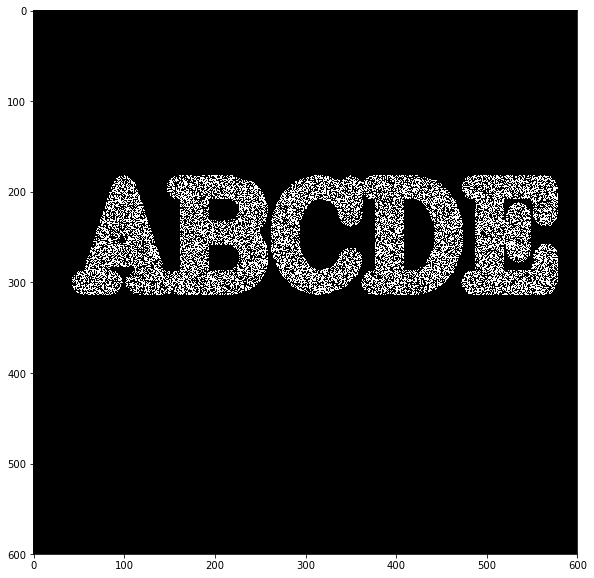

In [42]:
black_noise = black_noise * -255 # 반대값을 가지고 가기 위해서 마이너스 값을 곱했다.
# black_noise[black_noise == -255] = 0
black_noise_img = img + black_noise


black_noise_img[black_noise_img == -255] = 0
display_img(black_noise_img)

In [40]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

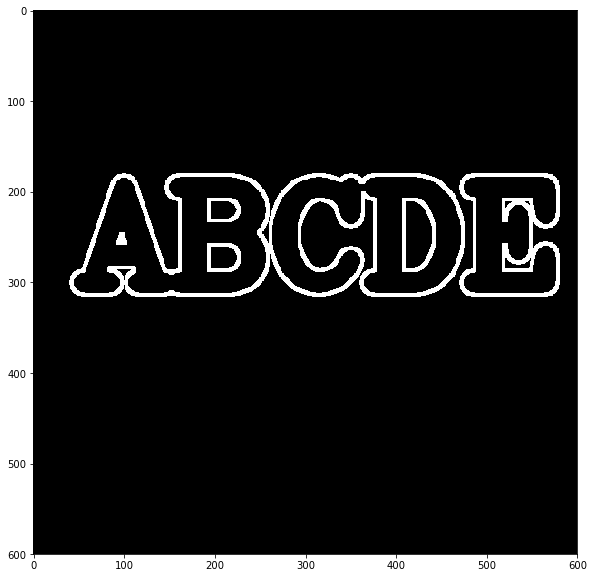

In [41]:
img = load_img()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)